<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


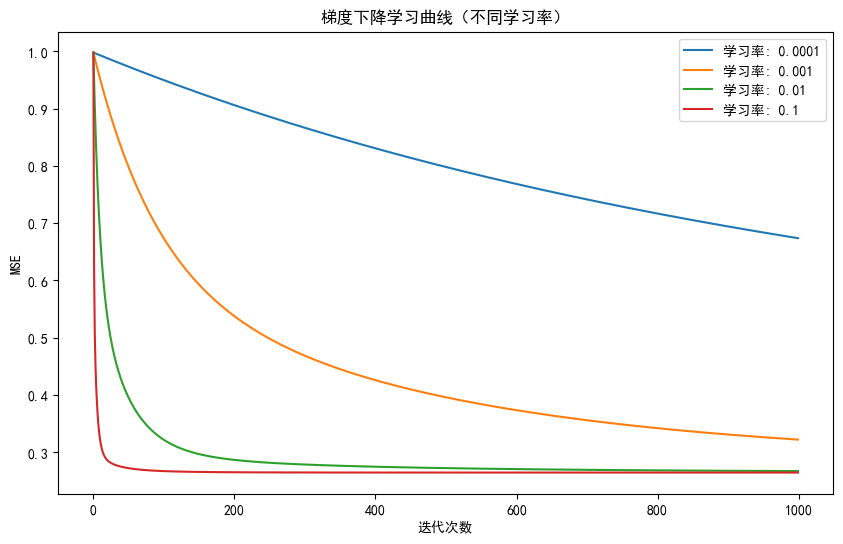

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

boston = pd.read_csv('D:\code\大三课程\机器学习\实验\实验一\\boston_house_prices.csv')
X = boston.iloc[:,1:13]
y = boston['MEDV']
# 标识异常值的阈值
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
# 找到包含异常值的行索引
outliers = ((X < (Q1 - threshold)) | (X > (Q3 + threshold))).any(axis=1)
# 删除异常值
cleaned_data = boston[~outliers]
print(boston.info())
X = boston.iloc[:,1:13]
y = boston['MEDV']

# 标准化数据
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()
# 梯度下降函数
def gradient_descent(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    mse_history = []

    for _ in range(num_iterations):
        y_pred = np.dot(X, weights)
        gradient = (1/n_samples) * np.dot(X.T, (y_pred - y))
        weights -= learning_rate * gradient
        mse = np.mean((y_pred - y) ** 2)
        mse_history.append(mse)
    return weights, mse_history

# 不同学习率
learning_rates = [0.0001, 0.001, 0.01, 0.1]
num_iterations = 1000

# 可视化梯度下降过程
plt.figure(figsize=(10, 6))
for learning_rate in learning_rates:
    _, mse_history = gradient_descent(X, y, learning_rate, num_iterations)
    plt.plot(range(num_iterations), mse_history, label=f'学习率: {learning_rate}')

plt.xlabel('迭代次数')
plt.ylabel('MSE')
plt.title('梯度下降学习曲线（不同学习率）')
plt.legend()
plt.show()

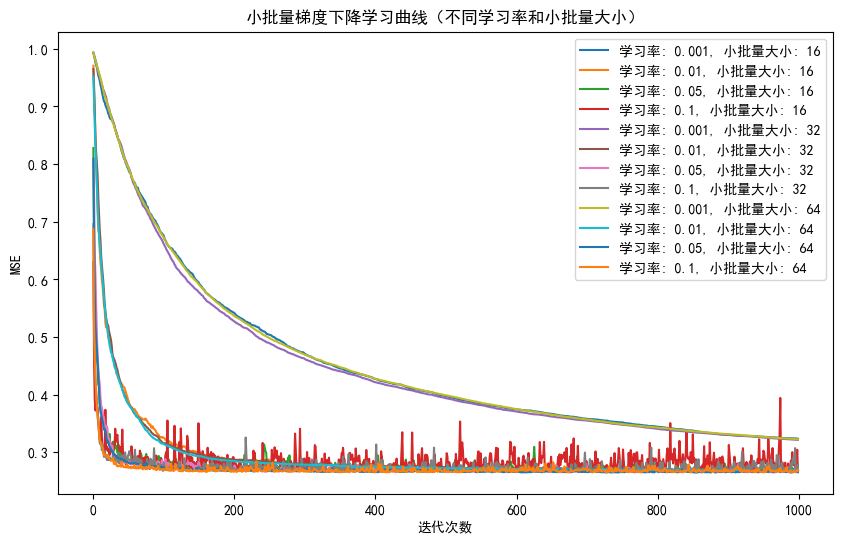

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

boston = pd.read_csv('D:\code\大三课程\机器学习\实验\实验一\\boston_house_prices.csv')
#print(boston.info())
X = boston.iloc[:, 1:13]
y = boston['MEDV']

# 标准化数据
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# 小批量梯度下降函数
def mini_batch_gradient_descent(X, y, learning_rate, num_iterations, batch_size):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    mse_history = []

    for _ in range(num_iterations):
        # 随机选择小批量样本
        indices = np.random.choice(n_samples, batch_size, replace=False)
        X_batch = X.iloc[indices, :]
        y_batch = y.iloc[indices]

        y_pred = np.dot(X_batch, weights)
        gradient = (1 / batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
        weights -= learning_rate * gradient
        mse = np.mean((np.dot(X, weights) - y) ** 2)  # 计算整个数据集的MSE
        mse_history.append(mse)

    return weights, mse_history

# 不同学习率和小批量大小
learning_rates = [0.001, 0.01, 0.05, 0.1]
batch_sizes = [16, 32, 64]  # 不同的小批量大小
num_iterations = 1000

# 可视化小批量梯度下降过程
plt.figure(figsize=(10, 6))

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        _, mse_history = mini_batch_gradient_descent(X, y, learning_rate, num_iterations, batch_size)
        plt.plot(range(num_iterations), mse_history, label=f'学习率: {learning_rate}, 小批量大小: {batch_size}')

plt.xlabel('迭代次数')
plt.ylabel('MSE')
plt.title('小批量梯度下降学习曲线（不同学习率和小批量大小）')
plt.legend()
plt.show()


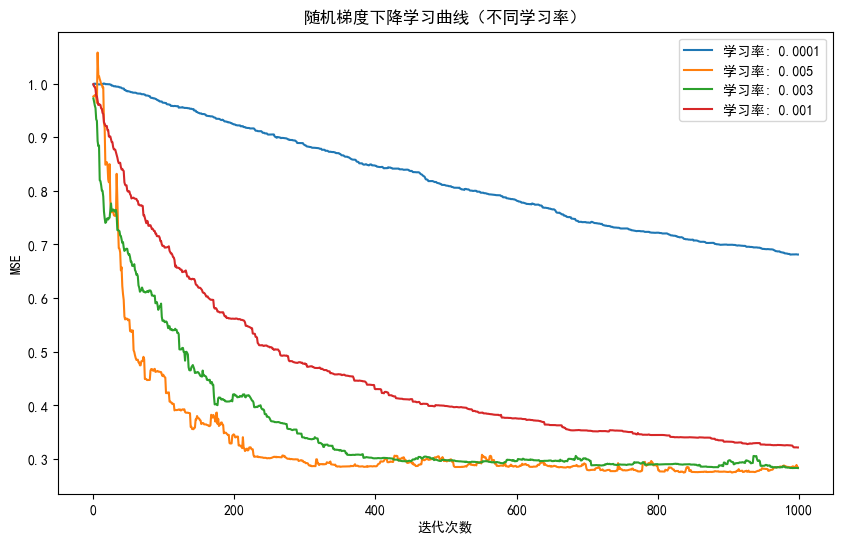

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

boston = pd.read_csv('D:\code\大三课程\机器学习\实验\实验一\\boston_house_prices.csv')
#print(boston.info())
X = boston.iloc[:, 1:13]
y = boston['MEDV']

# 标准化数据
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# 随机梯度下降函数
def stochastic_gradient_descent(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    mse_history = []

    for _ in range(num_iterations):
        # 随机选择一个样本
        index = np.random.randint(n_samples)
        X_sample = X.iloc[index, :]
        y_sample = y.iloc[index]

        y_pred = np.dot(X_sample, weights)
        gradient = -(y_sample - y_pred) * X_sample
        weights -= learning_rate * gradient
        mse = np.mean((np.dot(X, weights) - y) ** 2)  # 计算整个数据集的MSE
        mse_history.append(mse)

    return weights, mse_history

# 不同学习率
learning_rates = [0.0001, 0.005, 0.003, 0.001]

num_iterations = 1000

# 可视化随机梯度下降过程
plt.figure(figsize=(10, 6))
for learning_rate in learning_rates:
    _, mse_history = stochastic_gradient_descent(X, y, learning_rate, num_iterations)
    plt.plot(range(num_iterations), mse_history, label=f'学习率: {learning_rate}')

plt.xlabel('迭代次数')
plt.ylabel('MSE')
plt.title('随机梯度下降学习曲线（不同学习率）')
plt.legend()
plt.show()
